# Skyrim Statistics

### By Jules Alexandre

#### Skyrim is a game full of details with hundreads of NPCs and informations, Let's analyse and build some correlations over the game's data
#### We basically have :
- NPCs with their : Names, City of residence, Gender, Race, Occupation
- Cities with : Location, Weather Conditions, Who Controls it, how many inhabitants, etc.
- Percentage of each city over the global population

#### Skyrim is also teared between two sides fighting for the province's control :
- StormCloak and Empire presence in each cities

### Importing Libraries

In [18]:
#importing basic libraies
import os
from flask import Flask, request, jsonify
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql import functions as F
import threading

### Initialize Spark Session and launching it

In [6]:
os.environ["JAVA_HOME"] = "/opt/homebrew/opt/openjdk@11"

spark = SparkSession.builder \
    .appName("SkyrimDotoProject") \
    .master("local[*]") \
    .getOrCreate()

print("Spark session created successfully!")

Spark session created successfully!


In [44]:
#City Ennemployment
city_df = spark.read.csv("NPCsDotos.csv", header=True, inferSchema=True)
city = input("Please, Enter a city to search into")
city_df.filter(city_df["city"] == city).show(99)

+--------------------+--------+------+--------+-----------------+
|                name|    city|gender|    race|       occupation|
+--------------------+--------+------+--------+-----------------+
|                Nils|WindHelm|  Male|    Nord|             Cook|
|                None|WindHelm|  Male|  Dunmer|           Farmer|
|                None|WindHelm|Female|    Nord|           Farmer|
|                None|WindHelm|  Male|    Nord|           Farmer|
|                None|WindHelm|  Male|    Nord|           Farmer|
|                None|WindHelm|Female|    Nord|           Farmer|
|                None|WindHelm|  Male|Argonian|       Blacksmith|
|                None|WindHelm|  Male|    Nord|      Boat Worker|
|                None|WindHelm|  Male|    Nord|      Boat Worker|
|                None|WindHelm|  Male|    Nord|      Boat Worker|
|                None|WindHelm|  Male|    Nord|      Boat Worker|
|                None|WindHelm|  Male|    Nord|      Boat Worker|
|         

### Getting the number of people in a city for one job

In [40]:
#Checks how many people works as :
job = input("Please Enter a Job")
city_df.filter((city_df["occupation"] == job) & (city_df["city"] == city)).show(99)

+--------------------+--------+------+--------+------------+
|                name|    city|gender|    race|  occupation|
+--------------------+--------+------+--------+------------+
|  Mulush gro-Shugurz|Markarth|  Male|     Ork|Entrepreneur|
|Thonvor Silver-Blood|Markarth|  Male|    Nord|Entrepreneur|
|    Skaggi Scar-Face|Markarth|  Male|Imperial|Entrepreneur|
+--------------------+--------+------+--------+------------+



+--------------------+--------+------+--------+-----------------+
|                name|    city|gender|    race|       occupation|
+--------------------+--------+------+--------+-----------------+
|                Nils|WindHelm|  Male|    Nord|             Cook|
|                None|WindHelm|  Male|  Dunmer|           Farmer|
|                None|WindHelm|Female|    Nord|           Farmer|
|                None|WindHelm|  Male|    Nord|           Farmer|
|                None|WindHelm|  Male|    Nord|           Farmer|
|                None|WindHelm|Female|    Nord|           Farmer|
|                None|WindHelm|  Male|Argonian|       Blacksmith|
|                None|WindHelm|  Male|    Nord|      Boat Worker|
|                None|WindHelm|  Male|    Nord|      Boat Worker|
|                None|WindHelm|  Male|    Nord|      Boat Worker|
|                None|WindHelm|  Male|    Nord|      Boat Worker|
|                None|WindHelm|  Male|    Nord|      Boat Worker|
|         

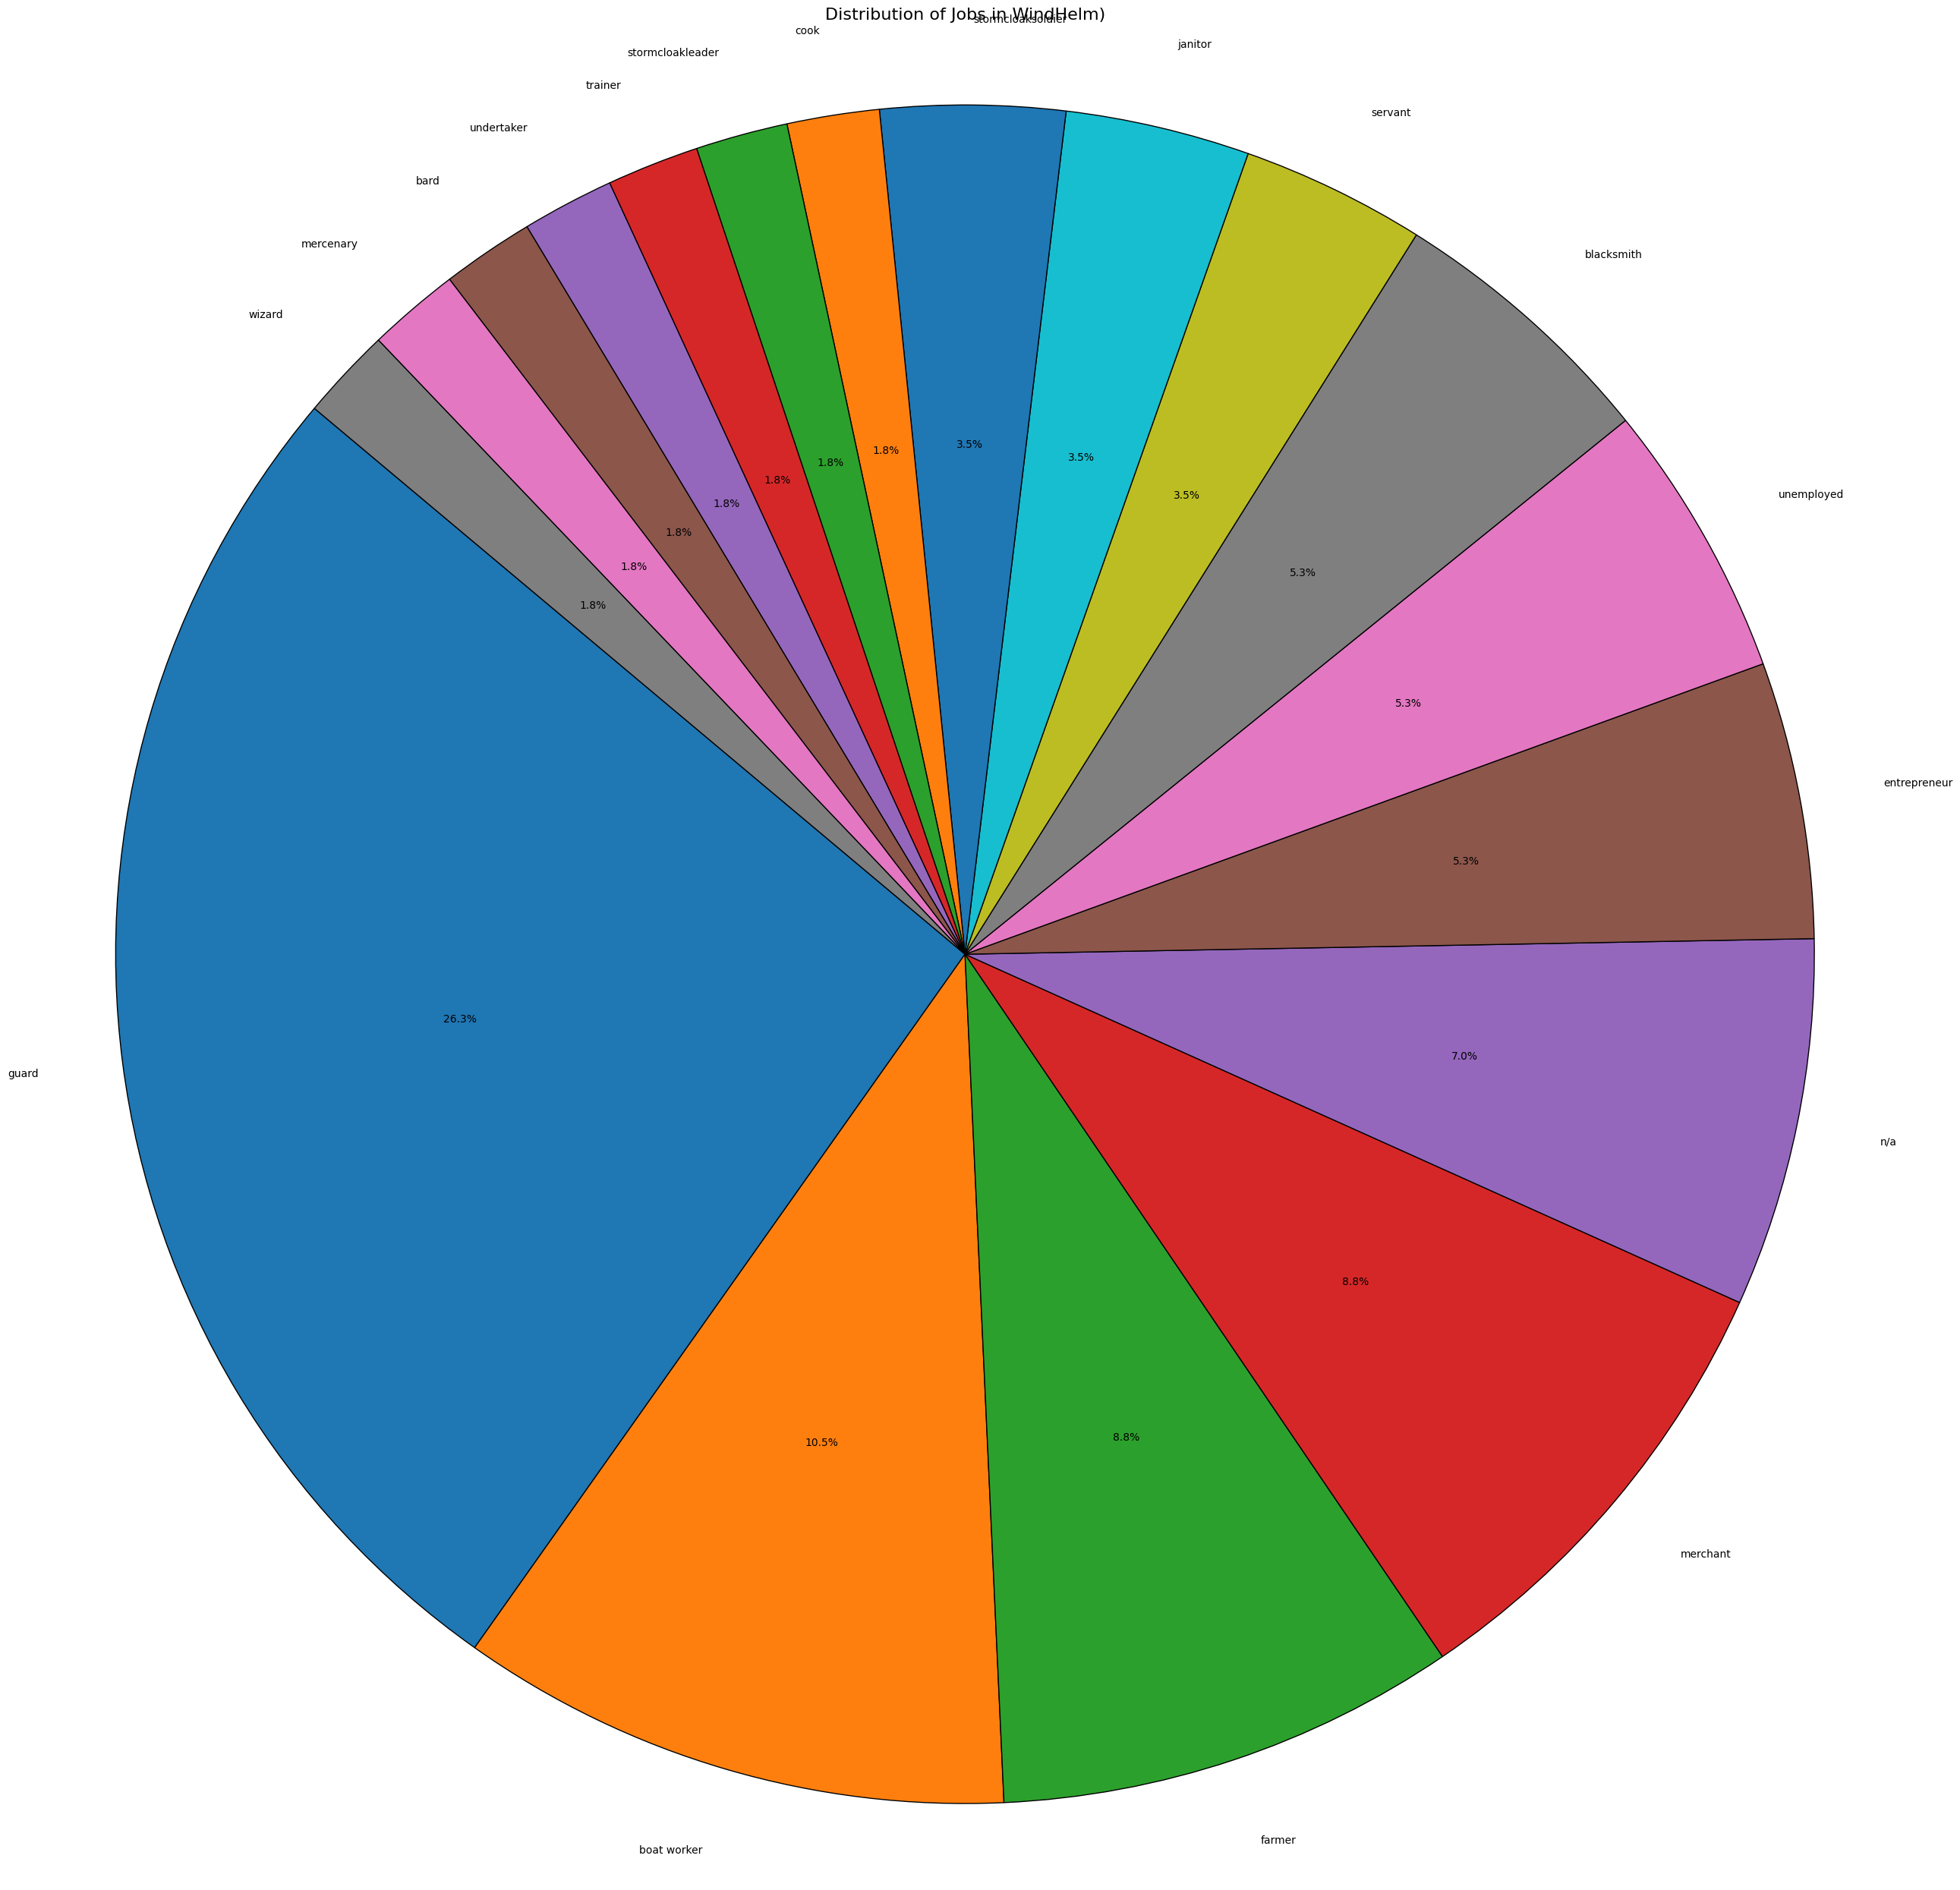

In [45]:
#Make a Graph with the Jobs

job_column_name = "occupation"

# 1. Filter the DataFrame to only include data for the specific city and job
# If you want to analyze a specific job in a specific city
filtered_df = city_df.filter((city_df["city"] == city))
filtered_df.show(99)  # Display the filtered results

# 2. Group by job (case-insensitive) and count occurrences
job_counts = filtered_df.groupBy(F.lower(F.col(job_column_name)).alias("job")).count()

# 3. Calculate the total number of people
total_count = filtered_df.count()

# 4. Calculate the percentage for each job
percentage_df = job_counts.withColumn(
    "percentage", F.col("count") / total_count
)

# 5. Order by percentage to see the most common jobs
percentage_df = percentage_df.orderBy(F.desc("percentage"))

# 6. Collect data to driver node for visualization (kept within Spark context)
job_data = percentage_df.select("job", "percentage").collect()

# 7. Create lists from collected data
jobs = [row["job"] for row in job_data]
percentages = [row["percentage"] for row in job_data]

# 8. Create the pie chart
plt.figure(figsize=(25, 25))
plt.pie(
    percentages,
    labels=jobs,
    autopct="%1.1f%%",
    startangle=140,
    wedgeprops={"edgecolor": "black"},
    textprops={'fontsize': 10}
)

plt.title(f"Distribution of Jobs in {city})", fontsize=16)
plt.axis("equal")
plt.tight_layout()
plt.show()

In [3]:
#test for Python

name = "Morgan"
price = 5000

print(f"You're a Wanted Man Mister {name}, ${price} For Your Head Alone")

You're a Wanted Man Mister Morgan, $5000 For Your Head Alone
